In [1]:
pip install matplotlib


[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn



[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn


[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import re
import string
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [37]:
df = pd.read_excel("D:\\tweets_uas.xlsx")

In [38]:
df

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment
0,@amirwawan_,2024-01-11T10:25:37.000Z,Yg kmren patung ironman dipecahin bocil\n\nFro...,761.0,6 rb,46 rb,3 jt,0.0
1,@blood_and_claws,2024-01-06T21:01:08.000Z,I love the soundtrack for Iron Man (2008) so much,1.0,5,50,4 rb,1.0
2,@imMaja,2024-01-13T01:12:53.000Z,Do we all agree that Iron Man (Tony Stark) is ...,3.0,3,19,1 rb,1.0
3,@MarvelHDgifs,2024-01-11T06:35:09.000Z,Iron Man (2008),4.0,45,749,37 rb,0.0
4,@comicbook_pros,2024-01-12T15:20:04.000Z,#ironman,30.0,478,2 rb,115 rb,0.0
5,@themedineer,2024-01-07T12:46:17.000Z,I'm literally Iron Man,20.0,194,3 rb,90 rb,0.0
6,@ESO76033667,2024-01-14T04:26:02.000Z,#卓上撮りこそ至高\n#IRONMAN #ZBrush,1.0,6,37,785,0.0
7,@IronMan_1128,2024-01-07T07:07:12.000Z,Sudharshan 35mm Theatre Situation \n#GunturKaa...,11.0,1 rb,5 rb,115 rb,0.0
8,@RDJisacupcake,2024-01-08T02:30:12.000Z,Rdj doing the Iron Man pose\n#GoldenGlobes,13.0,698,5 rb,87 rb,0.0
9,@historyofthemcu,2024-01-07T03:47:11.000Z,Stan Lee and Robert Downey Jr. on the set of I...,3.0,149,1 rb,33 rb,0.0


In [39]:
df.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment
0,@amirwawan_,2024-01-11T10:25:37.000Z,Yg kmren patung ironman dipecahin bocil\n\nFro...,761.0,6 rb,46 rb,3 jt,0.0
1,@blood_and_claws,2024-01-06T21:01:08.000Z,I love the soundtrack for Iron Man (2008) so much,1.0,5,50,4 rb,1.0
2,@imMaja,2024-01-13T01:12:53.000Z,Do we all agree that Iron Man (Tony Stark) is ...,3.0,3,19,1 rb,1.0
3,@MarvelHDgifs,2024-01-11T06:35:09.000Z,Iron Man (2008),4.0,45,749,37 rb,0.0
4,@comicbook_pros,2024-01-12T15:20:04.000Z,#ironman,30.0,478,2 rb,115 rb,0.0


In [40]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis',␣
 # ↪'censored'},
    annotate={"hashtag"},
    fix_html=True, # fix HTML tokens
    
    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",
    
    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",
    
    unpack_hashtags=True, # perform word segmentation on hashtags
    unpack_contractions=True, # Unpack contractions (can't -> can not)
    spell_correct_elong=False, # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [41]:
pip install ekphrasis


[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
    
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')
    
def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub(r'\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()
    
def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [43]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text)

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [45]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
  
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc)
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [46]:
df["step01"] = final_string

In [47]:
df.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01
0,@amirwawan_,2024-01-11T10:25:37.000Z,Yg kmren patung ironman dipecahin bocil\n\nFro...,761.0,6 rb,46 rb,3 jt,0.0,what if season almost included what if the ave...
1,@blood_and_claws,2024-01-06T21:01:08.000Z,I love the soundtrack for Iron Man (2008) so much,1.0,5,50,4 rb,1.0,what if season almost included what if the ave...
2,@imMaja,2024-01-13T01:12:53.000Z,Do we all agree that Iron Man (Tony Stark) is ...,3.0,3,19,1 rb,1.0,what if season almost included what if the ave...
3,@MarvelHDgifs,2024-01-11T06:35:09.000Z,Iron Man (2008),4.0,45,749,37 rb,0.0,what if season almost included what if the ave...
4,@comicbook_pros,2024-01-12T15:20:04.000Z,#ironman,30.0,478,2 rb,115 rb,0.0,what if season almost included what if the ave...
5,@themedineer,2024-01-07T12:46:17.000Z,I'm literally Iron Man,20.0,194,3 rb,90 rb,0.0,what if season almost included what if the ave...
6,@ESO76033667,2024-01-14T04:26:02.000Z,#卓上撮りこそ至高\n#IRONMAN #ZBrush,1.0,6,37,785,0.0,what if season almost included what if the ave...
7,@IronMan_1128,2024-01-07T07:07:12.000Z,Sudharshan 35mm Theatre Situation \n#GunturKaa...,11.0,1 rb,5 rb,115 rb,0.0,what if season almost included what if the ave...
8,@RDJisacupcake,2024-01-08T02:30:12.000Z,Rdj doing the Iron Man pose\n#GoldenGlobes,13.0,698,5 rb,87 rb,0.0,what if season almost included what if the ave...
9,@historyofthemcu,2024-01-07T03:47:11.000Z,Stan Lee and Robert Downey Jr. on the set of I...,3.0,149,1 rb,33 rb,0.0,what if season almost included what if the ave...


In [48]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [49]:
df_new = df[~df.isin(df_hapus)].dropna()

In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 58
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserTags    39 non-null     object 
 1   TimeStamps  39 non-null     object 
 2   Tweets      39 non-null     object 
 3   Replys      39 non-null     float64
 4   reTweets    39 non-null     object 
 5   Likes       39 non-null     object 
 6   Views       39 non-null     object 
 7   Sentiment   39 non-null     float64
 8   step01      39 non-null     object 
dtypes: float64(2), object(7)
memory usage: 3.0+ KB


In [51]:
# token
import nltk
from nltk.tokenize import word_tokenize

In [52]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wiwin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)


In [55]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01,tokens
0,@amirwawan_,2024-01-11T10:25:37.000Z,Yg kmren patung ironman dipecahin bocil\n\nFro...,761.0,6 rb,46 rb,3 jt,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
1,@blood_and_claws,2024-01-06T21:01:08.000Z,I love the soundtrack for Iron Man (2008) so much,1.0,5,50,4 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
2,@imMaja,2024-01-13T01:12:53.000Z,Do we all agree that Iron Man (Tony Stark) is ...,3.0,3,19,1 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
3,@MarvelHDgifs,2024-01-11T06:35:09.000Z,Iron Man (2008),4.0,45,749,37 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
4,@comicbook_pros,2024-01-12T15:20:04.000Z,#ironman,30.0,478,2 rb,115 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
5,@themedineer,2024-01-07T12:46:17.000Z,I'm literally Iron Man,20.0,194,3 rb,90 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
6,@ESO76033667,2024-01-14T04:26:02.000Z,#卓上撮りこそ至高\n#IRONMAN #ZBrush,1.0,6,37,785,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
7,@IronMan_1128,2024-01-07T07:07:12.000Z,Sudharshan 35mm Theatre Situation \n#GunturKaa...,11.0,1 rb,5 rb,115 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
8,@RDJisacupcake,2024-01-08T02:30:12.000Z,Rdj doing the Iron Man pose\n#GoldenGlobes,13.0,698,5 rb,87 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
9,@historyofthemcu,2024-01-07T03:47:11.000Z,Stan Lee and Robert Downey Jr. on the set of I...,3.0,149,1 rb,33 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."


In [64]:
normalized_word = pd.read_csv('kamus_alzami_clean.csv', sep=",")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]
        
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term␣
,→for term in document]


SyntaxError: invalid character '␣' (U+2423) (3360306173.py, line 10)

In [144]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

NameError: name 'normalized_term' is not defined

In [145]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

KeyError: 'final_tokens'

In [146]:
df_new["step02"] = final_string_tokens

ValueError: Length of values (0) does not match length of index (3)

In [56]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01,tokens
0,@amirwawan_,2024-01-11T10:25:37.000Z,Yg kmren patung ironman dipecahin bocil\n\nFro...,761.0,6 rb,46 rb,3 jt,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
1,@blood_and_claws,2024-01-06T21:01:08.000Z,I love the soundtrack for Iron Man (2008) so much,1.0,5,50,4 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
2,@imMaja,2024-01-13T01:12:53.000Z,Do we all agree that Iron Man (Tony Stark) is ...,3.0,3,19,1 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
3,@MarvelHDgifs,2024-01-11T06:35:09.000Z,Iron Man (2008),4.0,45,749,37 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
4,@comicbook_pros,2024-01-12T15:20:04.000Z,#ironman,30.0,478,2 rb,115 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
5,@themedineer,2024-01-07T12:46:17.000Z,I'm literally Iron Man,20.0,194,3 rb,90 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
6,@ESO76033667,2024-01-14T04:26:02.000Z,#卓上撮りこそ至高\n#IRONMAN #ZBrush,1.0,6,37,785,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
7,@IronMan_1128,2024-01-07T07:07:12.000Z,Sudharshan 35mm Theatre Situation \n#GunturKaa...,11.0,1 rb,5 rb,115 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
8,@RDJisacupcake,2024-01-08T02:30:12.000Z,Rdj doing the Iron Man pose\n#GoldenGlobes,13.0,698,5 rb,87 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
9,@historyofthemcu,2024-01-07T03:47:11.000Z,Stan Lee and Robert Downey Jr. on the set of I...,3.0,149,1 rb,33 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."


In [57]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

In [96]:
pip install Sastrawi


[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [59]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
    
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh','ah', 'yang']

# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [60]:
 df_new['step01'] = df_new['step01'].apply(str)


In [61]:
 df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01,tokens
0,@amirwawan_,2024-01-11T10:25:37.000Z,Yg kmren patung ironman dipecahin bocil\n\nFro...,761.0,6 rb,46 rb,3 jt,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
1,@blood_and_claws,2024-01-06T21:01:08.000Z,I love the soundtrack for Iron Man (2008) so much,1.0,5,50,4 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
2,@imMaja,2024-01-13T01:12:53.000Z,Do we all agree that Iron Man (Tony Stark) is ...,3.0,3,19,1 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
3,@MarvelHDgifs,2024-01-11T06:35:09.000Z,Iron Man (2008),4.0,45,749,37 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."
4,@comicbook_pros,2024-01-12T15:20:04.000Z,#ironman,30.0,478,2 rb,115 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,..."


In [62]:
i=0
final_string = []
s = ""
for sentence in df_new["step01"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [63]:
df_new.loc[:, ('ProcessedText')] = final_string

In [64]:
 df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01,tokens,ProcessedText
0,@amirwawan_,2024-01-11T10:25:37.000Z,Yg kmren patung ironman dipecahin bocil\n\nFro...,761.0,6 rb,46 rb,3 jt,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,...",what if season almost included what if the ave...
1,@blood_and_claws,2024-01-06T21:01:08.000Z,I love the soundtrack for Iron Man (2008) so much,1.0,5,50,4 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,...",what if season almost included what if the ave...
2,@imMaja,2024-01-13T01:12:53.000Z,Do we all agree that Iron Man (Tony Stark) is ...,3.0,3,19,1 rb,1.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,...",what if season almost included what if the ave...
3,@MarvelHDgifs,2024-01-11T06:35:09.000Z,Iron Man (2008),4.0,45,749,37 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,...",what if season almost included what if the ave...
4,@comicbook_pros,2024-01-12T15:20:04.000Z,#ironman,30.0,478,2 rb,115 rb,0.0,what if season almost included what if the ave...,"[what, if, season, almost, included, what, if,...",what if season almost included what if the ave...


In [65]:
 df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

In [66]:
import pandas as pd
import numpy as np

In [67]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [68]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [69]:
dataset_feature.head()

0    what if season almost included what if the ave...
1    what if season almost included what if the ave...
2    what if season almost included what if the ave...
3    what if season almost included what if the ave...
4    what if season almost included what if the ave...
Name: ProcessedText, dtype: object

In [70]:
dataset_label = dataset['Sentiment']

In [71]:
dataset_label.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Sentiment, dtype: float64

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 864x576 with 0 Axes>

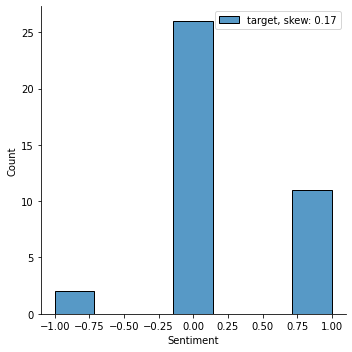

In [73]:
 # Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt. legend(loc='best')
plt.show()

In [74]:
 dataset_label.value_counts()

 0.0    26
 1.0    11
-1.0     2
Name: Sentiment, dtype: int64

In [75]:
 from sklearn.model_selection import GridSearchCV

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
 from sklearn.metrics import recall_score

In [78]:
from sklearn.metrics import f1_score

In [79]:
 from sklearn.metrics import precision_score

In [80]:
 from sklearn.model_selection import train_test_split


In [81]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature,dataset_label, test_size = 0.3, random_state=42)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
 Tfidf_Vectorizer = TfidfVectorizer()


In [84]:
 from sklearn.naive_bayes import MultinomialNB

In [85]:
 from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])


In [86]:
 parameters_nb = {
'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
#'tfidf__use_idf': (True, False),
'model__alpha': (0, 1, 1e-2, 1e-3)
}


In [87]:
 classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [88]:
 classifier_nb.fit(train_x, train_label.ravel())


C:\Users\wiwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\wiwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\wiwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [89]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.6666666666666666
Accuracy Test set:  0.6666666666666666


In [90]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.6666666666666666
Recall Test set:  0.6666666666666666


In [91]:
 precision_nb_train = precision_score(train_label, y_pred_nb_train,average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test,average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.4444444444444444
Precision Test set:  0.4444444444444444


C:\Users\wiwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wiwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


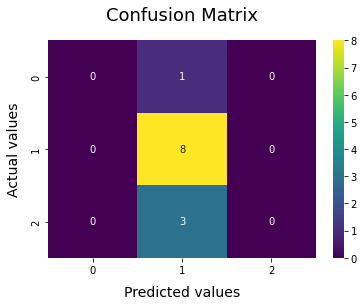

In [92]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap ='viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()


In [93]:
 classifier_nb.best_estimator_


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0))])

In [94]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0
tfidf__ngram_range: (1, 1)
